In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load the dataset
df = pd.read_csv('insurance_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

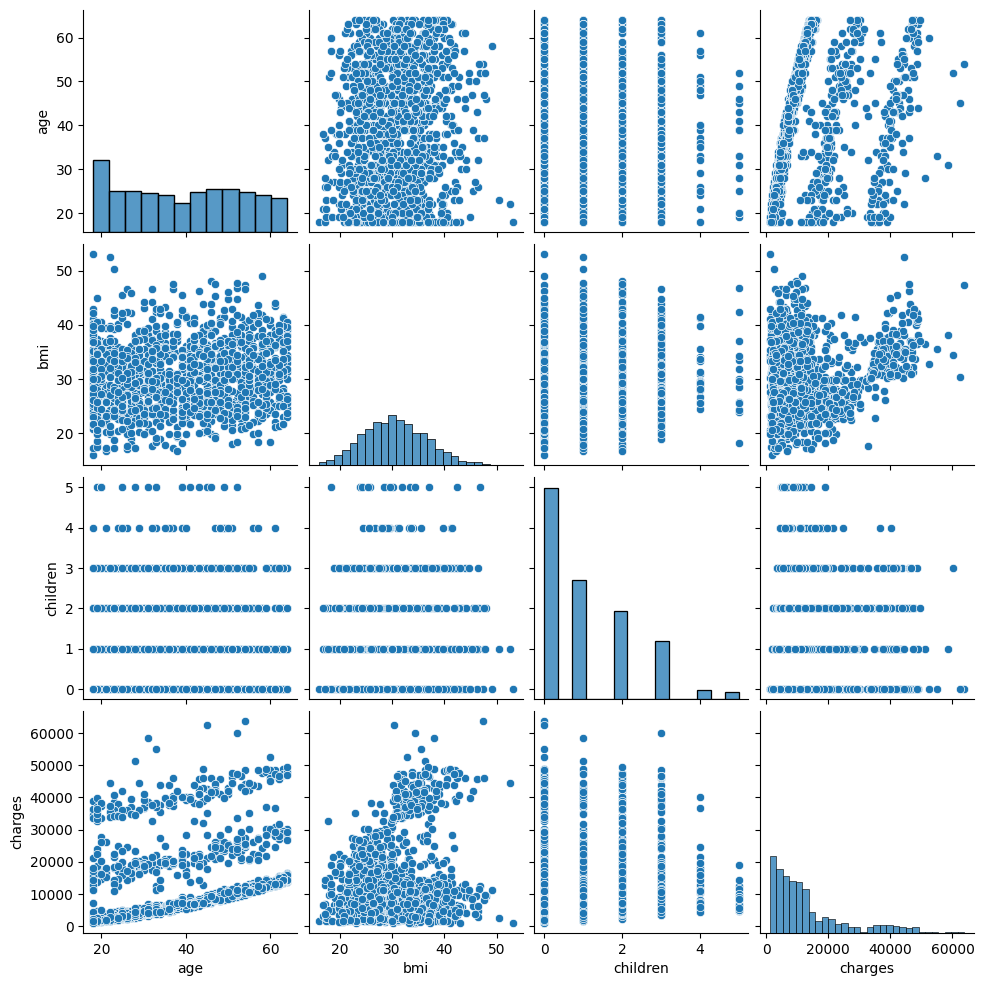

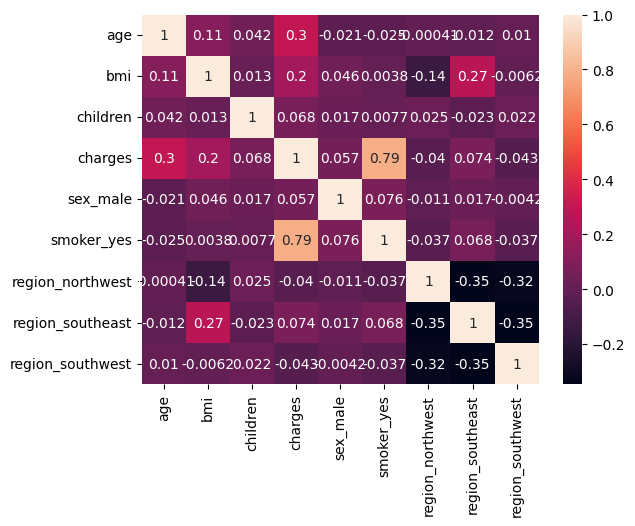

In [6]:
# Explore the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize data distributions and relationships
sns.pairplot(df)
plt.show()

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Check correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [7]:
# Example of feature engineering
df['bmi_squared'] = df['bmi']**2


In [8]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [10]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


RMSE: 5861.718020596228
R-squared: 0.7786794273755258


In [11]:
# Display the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Display the intercept
print(f'Intercept: {model.intercept_}')


           Variable   Coefficient
0               age    254.172066
1               bmi   1048.899537
2          children    422.557970
3          sex_male      1.424184
4        smoker_yes  23666.072505
5  region_northwest   -497.741344
6  region_southeast   -608.080493
7  region_southwest   -865.208828
8       bmi_squared    -11.360646
Intercept: -22528.717604245903


In [12]:
# Save the model to a file using pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


# **Finish**